# Vertailu: Reinforced learning vs Dynamic programming

Dynaamisella ohjelmoinnilla voi ratkaista elinkaarimalleja. Tässä verrataan dynaamisella ohjelmoinnilla ja RL:llä saatavia ratkaisuja yksinkertaisessa mallissa.

Tarkastellussa elinkaarimallissa _unemployment-v0_ on huomioitu vain kolme tilaa: työssä, työtön ja vanhuuseläkkeellä. Jokainen henkilö tekee vuosittain päätöksen työhönosallistumisesta ja alimman vanhuuseläkeiän täyttämisen jälkeen valinnan työn, työttömyyden ja vanhuuseläkkeen välillä. 

Mallissa palkat pidetään samoina läpi koko elinkaaren. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle, DynProgLifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.5 valittaa paljon)
import warnings
warnings.filterwarnings('ignore')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


# Dynaaminen ohjelmointi

Ajetaan elämänkaarimallia sekä dynaamisella ohjelmoinnilla. Verrataan tuloksia, jotta näemme, miten hyvin RL toimii. Ajoajat eivät ole kovin vertailukelpoisia.

Dynaaminen ohjelmointi-koodi toimii ainoastaan minimaalisen mallin kanssa.

In [ ]:
cc3=DynProgLifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
cc3.train()
cc3.simulate()
cc3.plot_V(1)
cc3.plot_emp()
cc3.plot_reward()

minimal model


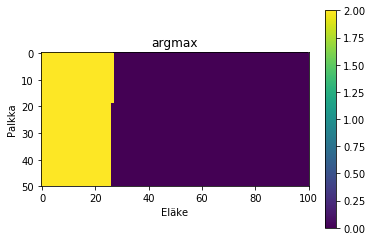

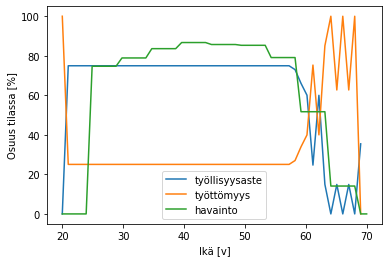

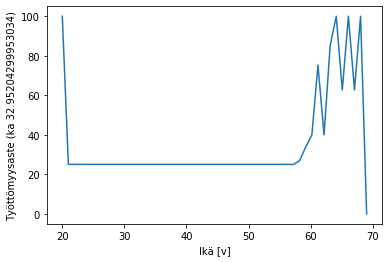

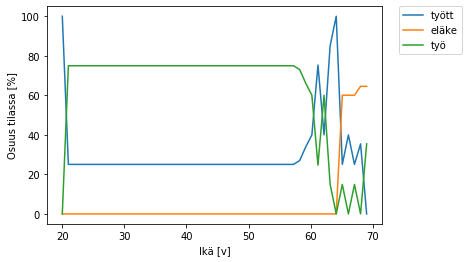

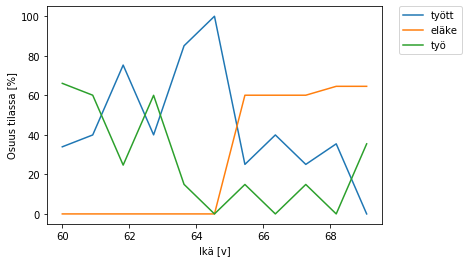

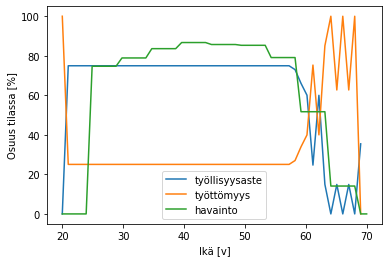

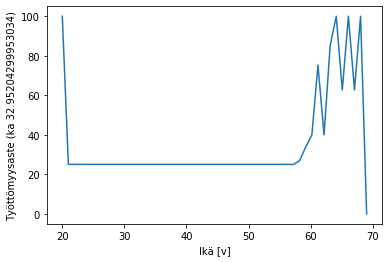

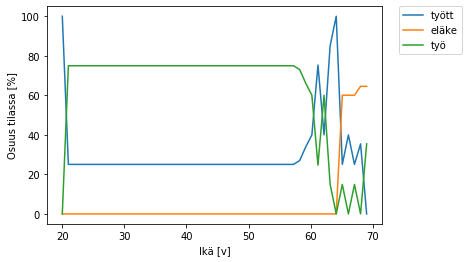

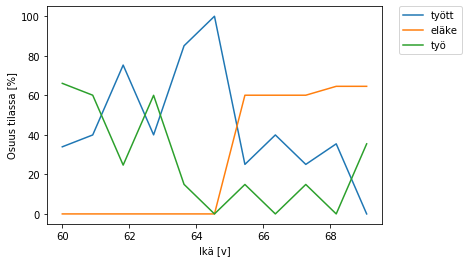

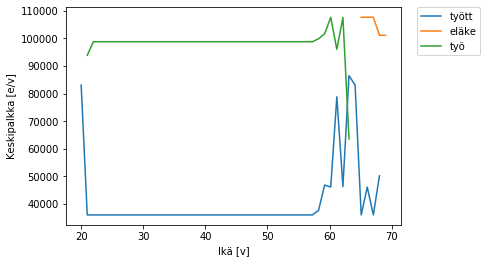

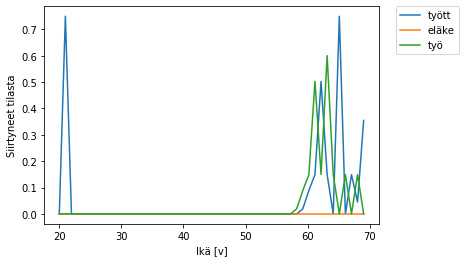

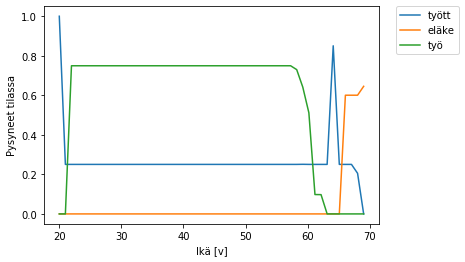

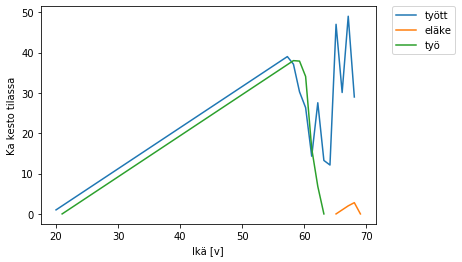

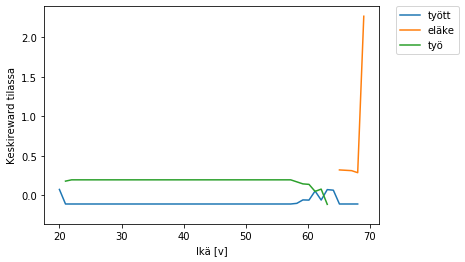

No handles with labels found to put in legend.


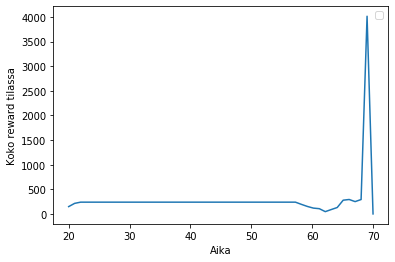

Yhteensä reward 7.5804038938807095


In [3]:
cc3=DynProgLifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
cc3.simulate(save='results/dp_minimal',pop=2_000)
cc3.plot_actV(1)
cc3.plot_emp()
cc3.render()

In [ ]:
cc3.plot_actV(40,emp=0,time_in_state=1)
cc3.plot_actV_diff(40)

Deterministinen versio, jossa tilasiirtymät eivät ole stokastisia

In [ ]:
cc6=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
cc6.train(train=True,steps=200_000,cont=True,rlmodel='acktr',save='miniperus')
cc6.simulate(pop=2_000,deterministic=True)

# Päätöksenteon vertailu

Lasketaan vertailukohta RL-menetelmällä ACKTR ja katsotaan paljonko tulokset eroavat.

In [1]:
cc4.compare_with(cc3)
cc5.compare_with(cc3)
cc6.compare_with(cc3)

NameError: name 'Lifecycle' is not defined

Tehdään sama RL-menetelmällä Deep Q-learning (dqn).

minimal model
<class 'str'> <class 'str'> <class 'str'>
saved/dqn_miniperus saved/dqn_miniperus
loadname= saved/dqn_miniperus
training...
--------------------------------------
| % time spent exploring  | 99       |
| episodes                | 100      |
| mean 100 episode reward | 3        |
| steps                   | 5048     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 98       |
| episodes                | 200      |
| mean 100 episode reward | 3.8      |
| steps                   | 10148    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 97       |
| episodes                | 300      |
| mean 100 episode reward | 3.5      |
| steps                   | 15248    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 96       |
| episodes                | 400      |
| mean 100 episode reward | 3.6      |
| st

--------------------------------------
| % time spent exploring  | 64       |
| episodes                | 3600     |
| mean 100 episode reward | 4.6      |
| steps                   | 183548   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 63       |
| episodes                | 3700     |
| mean 100 episode reward | 6.2      |
| steps                   | 188648   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 62       |
| episodes                | 3800     |
| mean 100 episode reward | 6.3      |
| steps                   | 193748   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 61       |
| episodes                | 3900     |
| mean 100 episode reward | 6.3      |
| steps                   | 198848   |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 28       |
| episodes                | 7200     |
| mean 100 episode reward | 7.3      |
| steps                   | 367148   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 27       |
| episodes                | 7300     |
| mean 100 episode reward | 7.6      |
| steps                   | 372248   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 26       |
| episodes                | 7400     |
| mean 100 episode reward | 7.4      |
| steps                   | 377348   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 25       |
| episodes                | 7500     |
| mean 100 episode reward | 6.4      |
| steps                   | 382448   |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 10800    |
| mean 100 episode reward | 8.2      |
| steps                   | 550748   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 10900    |
| mean 100 episode reward | 9.4      |
| steps                   | 555848   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 11000    |
| mean 100 episode reward | 8.1      |
| steps                   | 560948   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 11100    |
| mean 100 episode reward | 6.1      |
| steps                   | 566048   |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 14400    |
| mean 100 episode reward | 8.2      |
| steps                   | 734348   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 14500    |
| mean 100 episode reward | 9        |
| steps                   | 739448   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 14600    |
| mean 100 episode reward | 6.9      |
| steps                   | 744548   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 14700    |
| mean 100 episode reward | 7.5      |
| steps                   | 749648   |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 18000    |
| mean 100 episode reward | 7        |
| steps                   | 917948   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 18100    |
| mean 100 episode reward | 7.7      |
| steps                   | 923048   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 18200    |
| mean 100 episode reward | 7.8      |
| steps                   | 928148   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 18300    |
| mean 100 episode reward | 8.6      |
| steps                   | 933248   |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 21600    |
| mean 100 episode reward | 8.4      |
| steps                   | 1101548  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 21700    |
| mean 100 episode reward | 7.7      |
| steps                   | 1106648  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 21800    |
| mean 100 episode reward | 7.6      |
| steps                   | 1111748  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 21900    |
| mean 100 episode reward | 7.8      |
| steps                   | 1116848  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 25200    |
| mean 100 episode reward | 6.6      |
| steps                   | 1285148  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 25300    |
| mean 100 episode reward | 6.7      |
| steps                   | 1290248  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 25400    |
| mean 100 episode reward | 7.7      |
| steps                   | 1295348  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 25500    |
| mean 100 episode reward | 7        |
| steps                   | 1300448  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 28800    |
| mean 100 episode reward | 7.7      |
| steps                   | 1468748  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 28900    |
| mean 100 episode reward | 9.5      |
| steps                   | 1473848  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 29000    |
| mean 100 episode reward | 7.7      |
| steps                   | 1478948  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 29100    |
| mean 100 episode reward | 8.1      |
| steps                   | 1484048  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 32400    |
| mean 100 episode reward | 9.2      |
| steps                   | 1652348  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 32500    |
| mean 100 episode reward | 8.6      |
| steps                   | 1657448  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 32600    |
| mean 100 episode reward | 8.1      |
| steps                   | 1662548  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 32700    |
| mean 100 episode reward | 8.2      |
| steps                   | 1667648  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 36000    |
| mean 100 episode reward | 7.6      |
| steps                   | 1835948  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 36100    |
| mean 100 episode reward | 7.6      |
| steps                   | 1841048  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 36200    |
| mean 100 episode reward | 8.2      |
| steps                   | 1846148  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 36300    |
| mean 100 episode reward | 5.9      |
| steps                   | 1851248  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 39600    |
| mean 100 episode reward | 9        |
| steps                   | 2019548  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 39700    |
| mean 100 episode reward | 8.2      |
| steps                   | 2024648  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 39800    |
| mean 100 episode reward | 7.3      |
| steps                   | 2029748  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 39900    |
| mean 100 episode reward | 8        |
| steps                   | 2034848  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 43200    |
| mean 100 episode reward | 7.4      |
| steps                   | 2203148  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 43300    |
| mean 100 episode reward | 6.9      |
| steps                   | 2208248  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 43400    |
| mean 100 episode reward | 8.4      |
| steps                   | 2213348  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 43500    |
| mean 100 episode reward | 7.7      |
| steps                   | 2218448  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 46800    |
| mean 100 episode reward | 8        |
| steps                   | 2386748  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 46900    |
| mean 100 episode reward | 8.8      |
| steps                   | 2391848  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 47000    |
| mean 100 episode reward | 8.9      |
| steps                   | 2396948  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 47100    |
| mean 100 episode reward | 7.1      |
| steps                   | 2402048  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 50400    |
| mean 100 episode reward | 7.3      |
| steps                   | 2570348  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 50500    |
| mean 100 episode reward | 8        |
| steps                   | 2575448  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 50600    |
| mean 100 episode reward | 7.2      |
| steps                   | 2580548  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 50700    |
| mean 100 episode reward | 6.8      |
| steps                   | 2585648  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 54000    |
| mean 100 episode reward | 7.8      |
| steps                   | 2753948  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 54100    |
| mean 100 episode reward | 8.2      |
| steps                   | 2759048  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 54200    |
| mean 100 episode reward | 9.2      |
| steps                   | 2764148  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 54300    |
| mean 100 episode reward | 7.2      |
| steps                   | 2769248  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 57600    |
| mean 100 episode reward | 7.2      |
| steps                   | 2937548  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 57700    |
| mean 100 episode reward | 7.1      |
| steps                   | 2942648  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 57800    |
| mean 100 episode reward | 7.5      |
| steps                   | 2947748  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 57900    |
| mean 100 episode reward | 6.9      |
| steps                   | 2952848  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 61200    |
| mean 100 episode reward | 7.7      |
| steps                   | 3121148  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 61300    |
| mean 100 episode reward | 8.2      |
| steps                   | 3126248  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 61400    |
| mean 100 episode reward | 8.2      |
| steps                   | 3131348  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 61500    |
| mean 100 episode reward | 7.8      |
| steps                   | 3136448  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 64800    |
| mean 100 episode reward | 8.8      |
| steps                   | 3304748  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 64900    |
| mean 100 episode reward | 9.5      |
| steps                   | 3309848  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 65000    |
| mean 100 episode reward | 8.7      |
| steps                   | 3314948  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 65100    |
| mean 100 episode reward | 9.8      |
| steps                   | 3320048  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 68400    |
| mean 100 episode reward | 8.5      |
| steps                   | 3488348  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 68500    |
| mean 100 episode reward | 8.1      |
| steps                   | 3493448  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 68600    |
| mean 100 episode reward | 6.7      |
| steps                   | 3498548  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 68700    |
| mean 100 episode reward | 8.5      |
| steps                   | 3503648  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 72000    |
| mean 100 episode reward | 7.4      |
| steps                   | 3671948  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 72100    |
| mean 100 episode reward | 7.4      |
| steps                   | 3677048  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 72200    |
| mean 100 episode reward | 7.1      |
| steps                   | 3682148  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 72300    |
| mean 100 episode reward | 8.1      |
| steps                   | 3687248  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 75600    |
| mean 100 episode reward | 7.1      |
| steps                   | 3855548  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 75700    |
| mean 100 episode reward | 7.2      |
| steps                   | 3860648  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 75800    |
| mean 100 episode reward | 8        |
| steps                   | 3865748  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 75900    |
| mean 100 episode reward | 7.3      |
| steps                   | 3870848  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 79200    |
| mean 100 episode reward | 8.1      |
| steps                   | 4039148  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 79300    |
| mean 100 episode reward | 8.6      |
| steps                   | 4044248  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 79400    |
| mean 100 episode reward | 7.1      |
| steps                   | 4049348  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 79500    |
| mean 100 episode reward | 8.1      |
| steps                   | 4054448  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 82800    |
| mean 100 episode reward | 9.3      |
| steps                   | 4222748  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 82900    |
| mean 100 episode reward | 8.9      |
| steps                   | 4227848  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 83000    |
| mean 100 episode reward | 7.5      |
| steps                   | 4232948  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 83100    |
| mean 100 episode reward | 7.8      |
| steps                   | 4238048  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 86400    |
| mean 100 episode reward | 8.1      |
| steps                   | 4406348  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 86500    |
| mean 100 episode reward | 6.8      |
| steps                   | 4411448  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 86600    |
| mean 100 episode reward | 9.1      |
| steps                   | 4416548  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 86700    |
| mean 100 episode reward | 8.1      |
| steps                   | 4421648  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 90000    |
| mean 100 episode reward | 8.5      |
| steps                   | 4589948  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 90100    |
| mean 100 episode reward | 7.4      |
| steps                   | 4595048  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 90200    |
| mean 100 episode reward | 9.3      |
| steps                   | 4600148  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 90300    |
| mean 100 episode reward | 8.9      |
| steps                   | 4605248  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 93600    |
| mean 100 episode reward | 7.2      |
| steps                   | 4773548  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 93700    |
| mean 100 episode reward | 7.9      |
| steps                   | 4778648  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 93800    |
| mean 100 episode reward | 8.7      |
| steps                   | 4783748  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 93900    |
| mean 100 episode reward | 6.3      |
| steps                   | 4788848  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 97200    |
| mean 100 episode reward | 9        |
| steps                   | 4957148  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 97300    |
| mean 100 episode reward | 7.9      |
| steps                   | 4962248  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 97400    |
| mean 100 episode reward | 7.6      |
| steps                   | 4967348  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 97500    |
| mean 100 episode reward | 8.4      |
| steps                   | 4972448  |
--------------------------------------
--------------------------------------
| % time spent exploring 

done


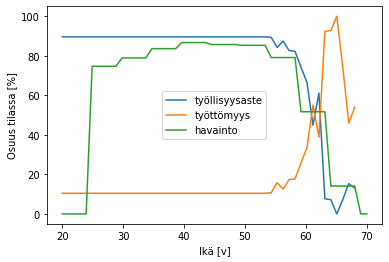

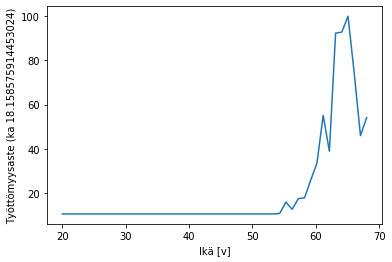

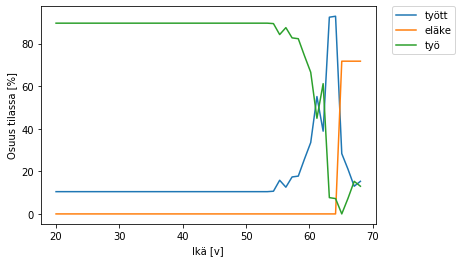

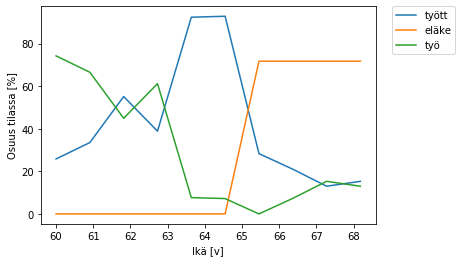

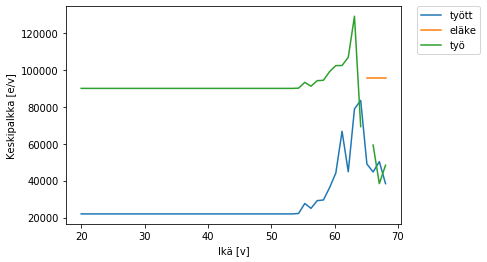

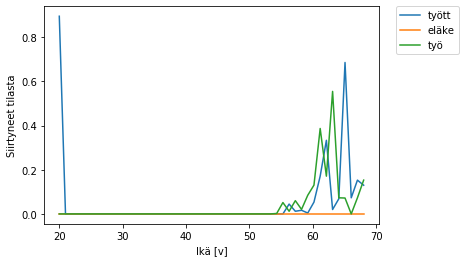

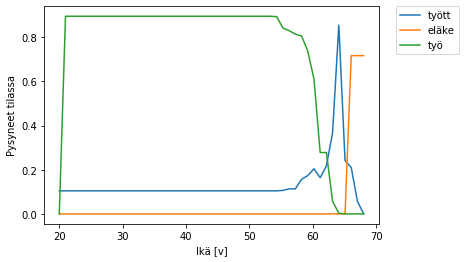

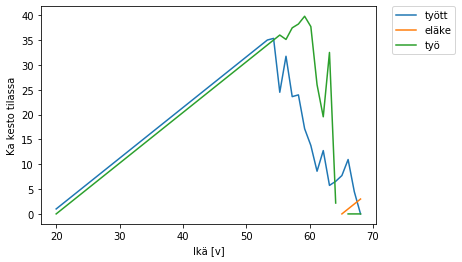

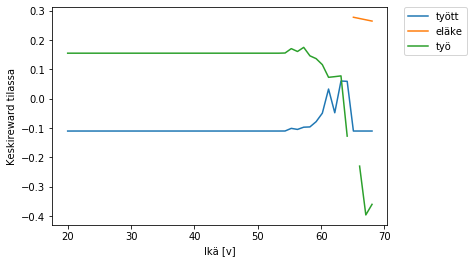

No handles with labels found to put in legend.


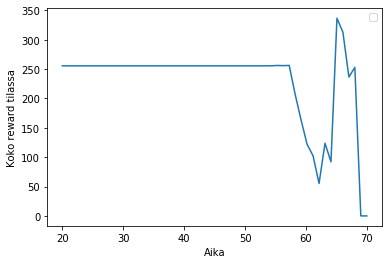

Yhteensä reward 5.9826425800560346


In [7]:
cc5=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
cc5.train(steps=5_000_000,cont=True,rlmodel='dqn',save='miniperus')
cc5.simulate(pop=2_000,rlmodel='dqn',load='miniperus',deterministic=True)

minimal model
predicting...


done


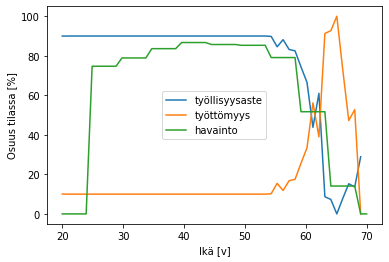

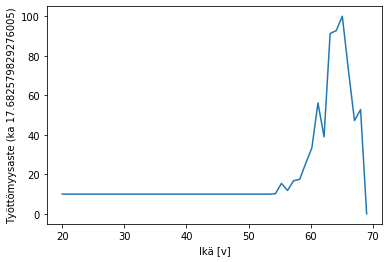

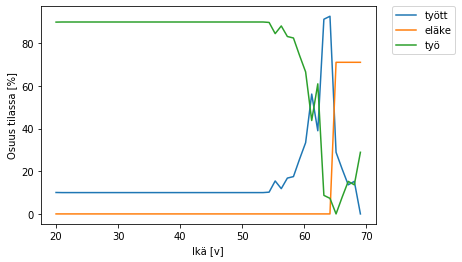

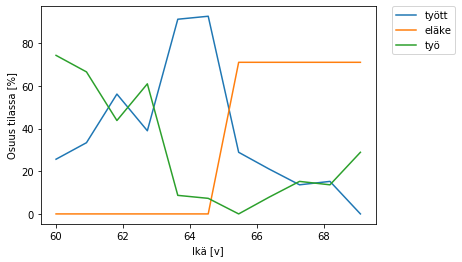

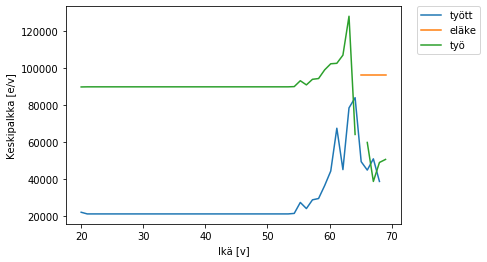

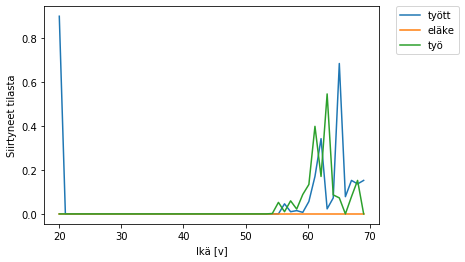

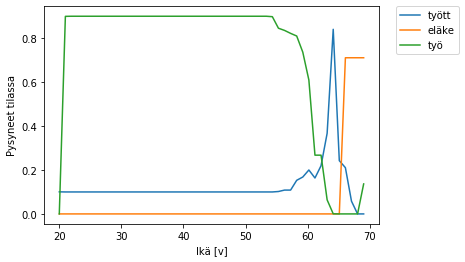

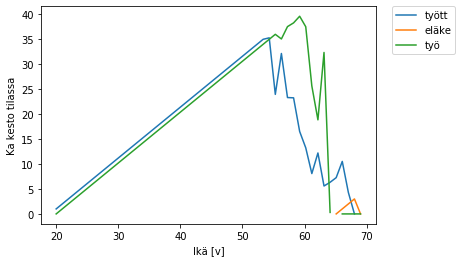

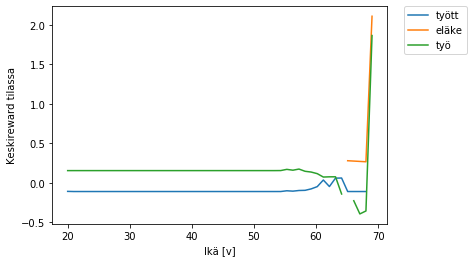

No handles with labels found to put in legend.


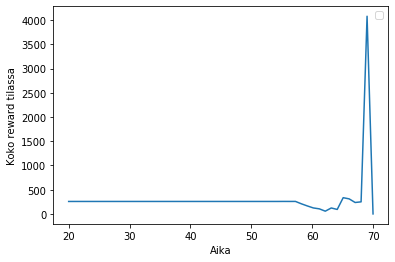

Yhteensä reward 8.057216983860966


In [3]:
cc7=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
cc7.simulate(pop=2_000,deterministic=True,load='miniperus',rlmodel='dqn')

Deterministinen aktion valinta.

minimal model
predicting...


done


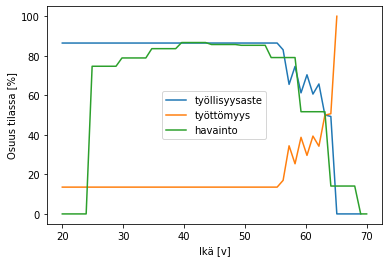

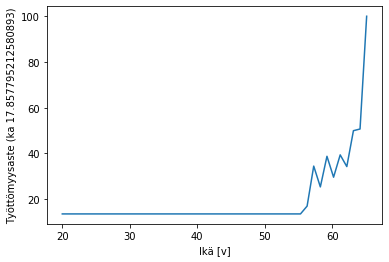

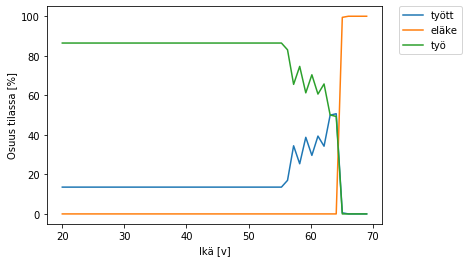

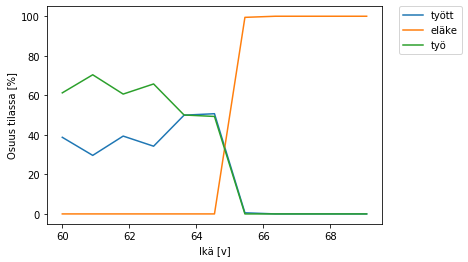

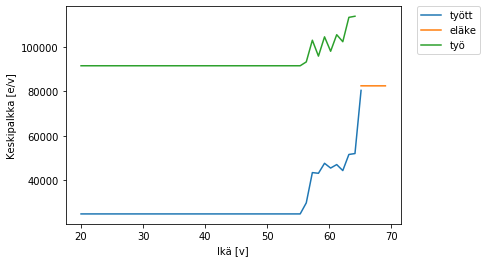

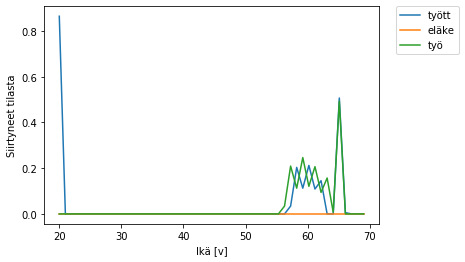

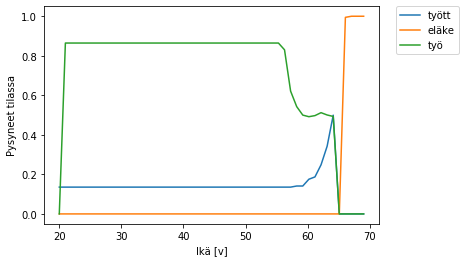

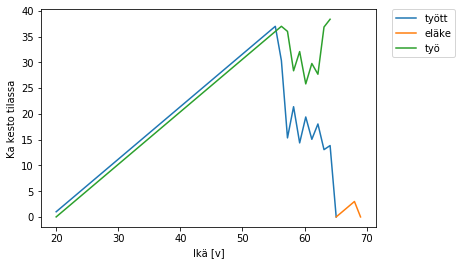

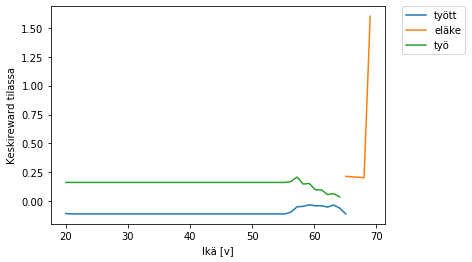

No handles with labels found to put in legend.


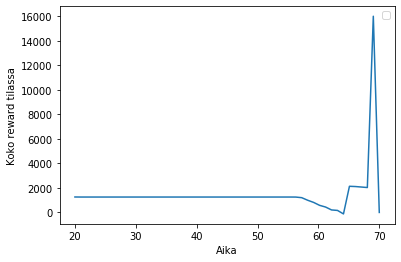

Yhteensä reward 7.635467330576887


In [7]:
cc6=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
#cc6.train(steps=1_000_000,cont=False,rlmodel='acktr',save='miniperus')
cc6.simulate(pop=10_000,deterministic=True,load='miniperus',rlmodel='acktr',save='results/acktr_tulokset_miniperus_det')
#cc7=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
#cc6.train(steps=1_000_000,cont=False,rlmodel='acktr',save='miniperus')
#cc7.simulate(pop=2_000,deterministic=True,load='miniperus',rlmodel='dqn')

minimal model
minimal model


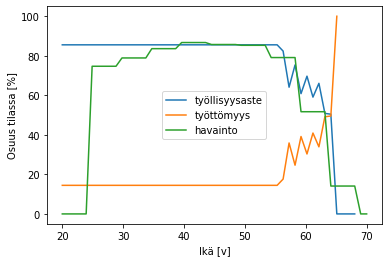

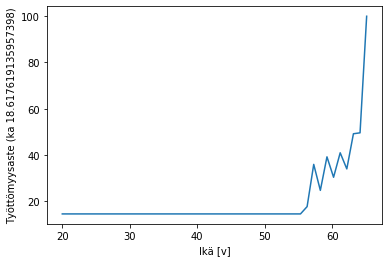

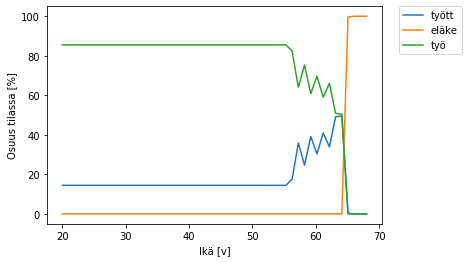

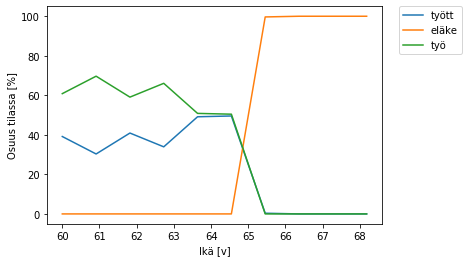

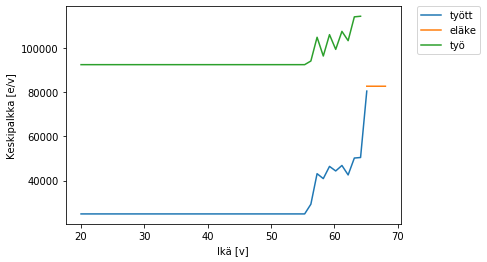

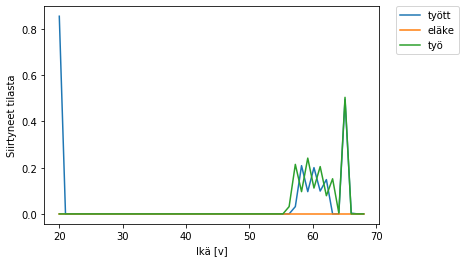

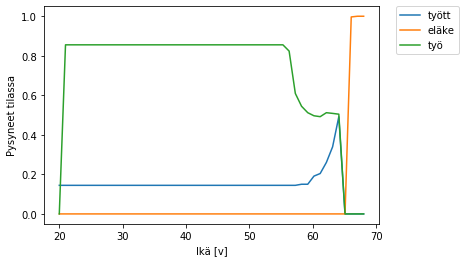

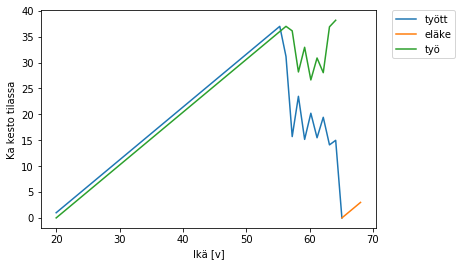

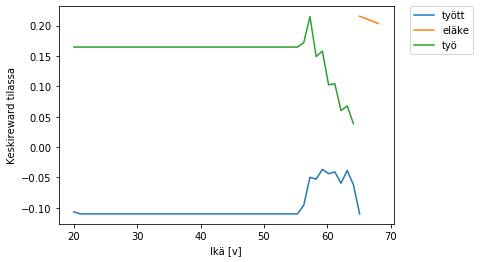

No handles with labels found to put in legend.


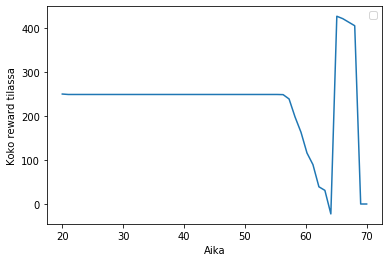

Yhteensä reward 11.98232290586575
minimal model


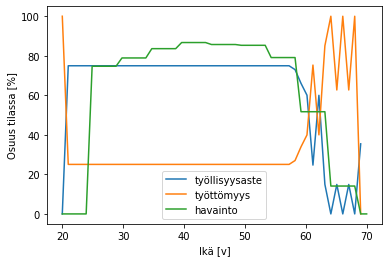

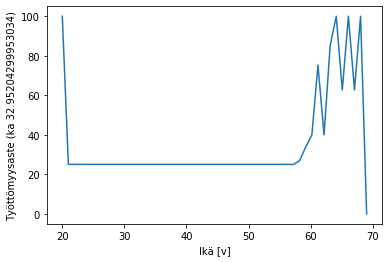

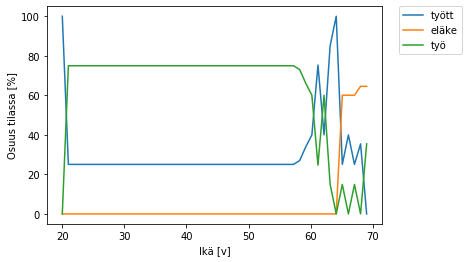

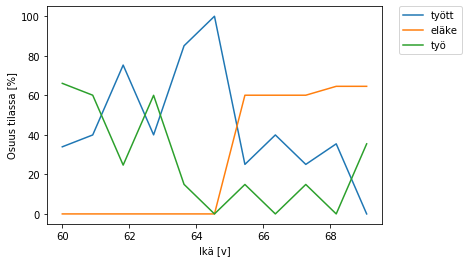

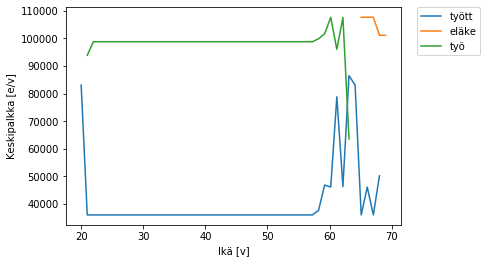

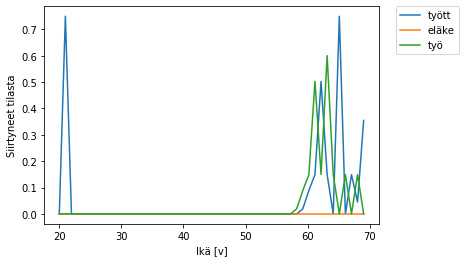

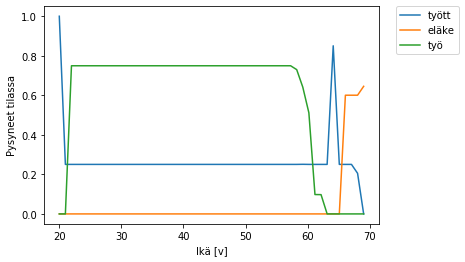

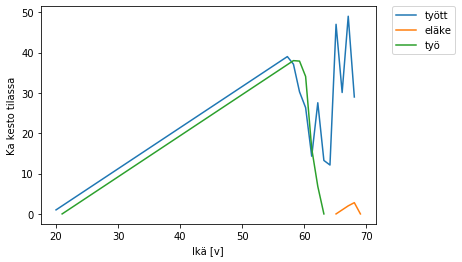

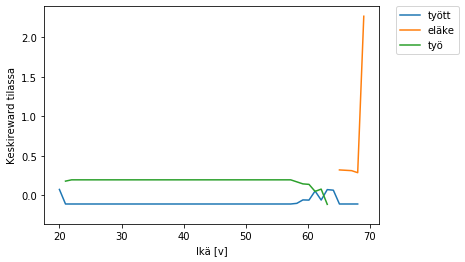

No handles with labels found to put in legend.


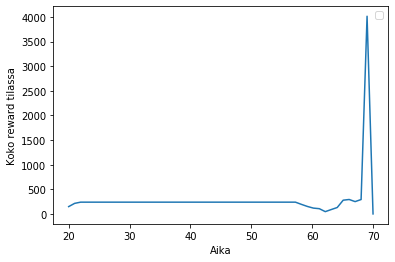

Yhteensä reward 15.160807787761419


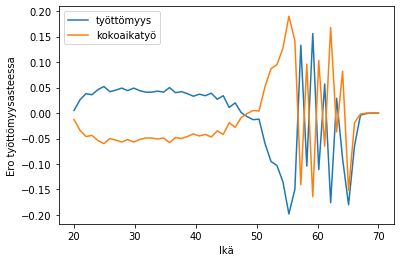

Työllisyysvaikutus 25-62-vuotiaisiin noin -31086.0 htv ja -31086.0 työllistä
Epävarmuus työllisyysasteissa 0.061980642139300234, hajonta 0.07435059977809887


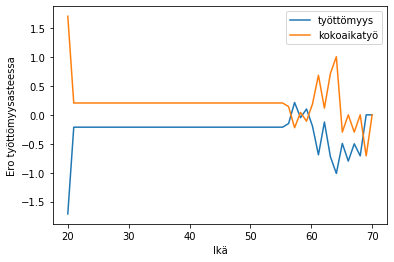

Työllisyysvaikutus 25-62-vuotiaisiin noin 461498.0 htv ja 461498.0 työllistä
Epävarmuus työllisyysasteissa 0.061980642139300234, hajonta 0.08789404438705951


In [4]:
cc0=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
cc0.load_sim('results/acktr_tulokset_miniperus')
cc1=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
cc1.load_sim('results/acktr_tulokset_miniperus_det')
cc1.render()
cc2=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
cc2.load_sim('results/dp_minimal')
cc2.render()

cc1.compare_with(cc0)
cc1.compare_with(cc2)
#cc5.compare_with(cc7)

In [ ]:
cc2.render()
cc1.render()
cc0.render()

# Päätöksenteon vertailu

Vertaillaan eri mallien tuloksia ja niiden eroja.

In [ ]:
cc4.compare_with(cc3)
cc5.compare_with(cc3)

In [ ]:
cc=DynProgLifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
ika=55
cc.plot_actV(ika,emp=1,time_in_state=0)
cc.RL_simulate_V(ika,rlmodel='acktr',emp=1,time_in_state=0,load='miniperus')
cc.RL_simulate_V(ika,rlmodel='acktr',emp=0,time_in_state=1,load='miniperus')
cc.RL_simulate_V(ika,rlmodel='acktr',emp=2,time_in_state=0,load='miniperus')

# Jakaumat

minimal model
training...
---------------------------------
| explained_variance | -0.0276  |
| fps                | 807      |
| nupdates           | 1        |
| policy_entropy     | 1.1      |
| policy_loss        | 0.66     |
| total_timesteps    | 0        |
| value_loss         | 1.53     |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 655      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| policy_loss        | 0.0249   |
| total_timesteps    | 61875    |
| value_loss         | 0.0463   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 969      |
| nupdates           | 200      |
| policy_entropy     | 0.707    |
| policy_loss        | -0.0308  |
| total_timesteps    | 124375   |
| value_loss         | 0.00726  |
---------------------------------
---------------------------------
| explained_variance |

done
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 644      |
| nupdates           | 1        |
| policy_entropy     | 0.737    |
| policy_loss        | -0.0165  |
| total_timesteps    | 0        |
| value_loss         | 0.00228  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 1680     |
| nupdates           | 100      |
| policy_entropy     | 0.738    |
| policy_loss        | -0.0157  |
| total_timesteps    | 61875    |
| value_loss         | 0.00156  |
---------------------------------
done
training...
---------------------------------
| explained_variance | 1        |
| fps                | 645      |
| nupdates           | 1        |
| policy_entropy     | 0.733    |
| policy_loss        | -0.00874 |
| total_timesteps    | 0        |
| value_loss         | 0.000732 |
---------------------------------
---------------------------------
| explained_va

---------------------------------
| explained_variance | 1        |
| fps                | 769      |
| nupdates           | 1        |
| policy_entropy     | 0.706    |
| policy_loss        | -0.00637 |
| total_timesteps    | 0        |
| value_loss         | 0.000773 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 1798     |
| nupdates           | 100      |
| policy_entropy     | 0.743    |
| policy_loss        | -0.00587 |
| total_timesteps    | 61875    |
| value_loss         | 0.00021  |
---------------------------------
done
training...
---------------------------------
| explained_variance | 1        |
| fps                | 750      |
| nupdates           | 1        |
| policy_entropy     | 0.694    |
| policy_loss        | -0.0122  |
| total_timesteps    | 0        |
| value_loss         | 0.000674 |
---------------------------------
---------------------------------
| explained_variance | 0.999   

---------------------------------
| explained_variance | 0.999    |
| fps                | 1749     |
| nupdates           | 100      |
| policy_entropy     | 0.737    |
| policy_loss        | -0.0149  |
| total_timesteps    | 61875    |
| value_loss         | 0.00182  |
---------------------------------
done
training...
---------------------------------
| explained_variance | 1        |
| fps                | 738      |
| nupdates           | 1        |
| policy_entropy     | 0.69     |
| policy_loss        | -0.00446 |
| total_timesteps    | 0        |
| value_loss         | 0.00021  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 1747     |
| nupdates           | 100      |
| policy_entropy     | 0.728    |
| policy_loss        | -0.00669 |
| total_timesteps    | 61875    |
| value_loss         | 0.000624 |
---------------------------------
done
training...
---------------------------------
| explained_va

done
training...
---------------------------------
| explained_variance | 1        |
| fps                | 703      |
| nupdates           | 1        |
| policy_entropy     | 0.704    |
| policy_loss        | -0.00582 |
| total_timesteps    | 0        |
| value_loss         | 9.02e-05 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 1753     |
| nupdates           | 100      |
| policy_entropy     | 0.729    |
| policy_loss        | -0.011   |
| total_timesteps    | 61875    |
| value_loss         | 0.000362 |
---------------------------------
done
training...
---------------------------------
| explained_variance | 1        |
| fps                | 701      |
| nupdates           | 1        |
| policy_entropy     | 0.691    |
| policy_loss        | -0.0103  |
| total_timesteps    | 0        |
| value_loss         | 0.000569 |
---------------------------------
---------------------------------
| explained_va

---------------------------------
| explained_variance | 1        |
| fps                | 709      |
| nupdates           | 1        |
| policy_entropy     | 0.691    |
| policy_loss        | -0.00537 |
| total_timesteps    | 0        |
| value_loss         | 0.00015  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 1756     |
| nupdates           | 100      |
| policy_entropy     | 0.714    |
| policy_loss        | -0.00698 |
| total_timesteps    | 61875    |
| value_loss         | 0.000178 |
---------------------------------
done
training...
---------------------------------
| explained_variance | 1        |
| fps                | 702      |
| nupdates           | 1        |
| policy_entropy     | 0.68     |
| policy_loss        | -0.0072  |
| total_timesteps    | 0        |
| value_loss         | 0.00027  |
---------------------------------
---------------------------------
| explained_variance | 1       

---------------------------------
| explained_variance | 1        |
| fps                | 1664     |
| nupdates           | 100      |
| policy_entropy     | 0.712    |
| policy_loss        | -0.00737 |
| total_timesteps    | 61875    |
| value_loss         | 0.000141 |
---------------------------------
done
training...
---------------------------------
| explained_variance | 1        |
| fps                | 705      |
| nupdates           | 1        |
| policy_entropy     | 0.669    |
| policy_loss        | -0.00554 |
| total_timesteps    | 0        |
| value_loss         | 0.000125 |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1742     |
| nupdates           | 100      |
| policy_entropy     | 0.7      |
| policy_loss        | -0.0137  |
| total_timesteps    | 61875    |
| value_loss         | 0.00177  |
---------------------------------
done
training...
---------------------------------
| explained_va

done
training...
---------------------------------
| explained_variance | 1        |
| fps                | 648      |
| nupdates           | 1        |
| policy_entropy     | 0.686    |
| policy_loss        | -0.00689 |
| total_timesteps    | 0        |
| value_loss         | 8.94e-05 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 1729     |
| nupdates           | 100      |
| policy_entropy     | 0.703    |
| policy_loss        | -0.011   |
| total_timesteps    | 61875    |
| value_loss         | 0.000385 |
---------------------------------
done
training...
---------------------------------
| explained_variance | 1        |
| fps                | 641      |
| nupdates           | 1        |
| policy_entropy     | 0.704    |
| policy_loss        | -0.00634 |
| total_timesteps    | 0        |
| value_loss         | 0.00014  |
---------------------------------
---------------------------------
| explained_va

done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done
predicting...


done


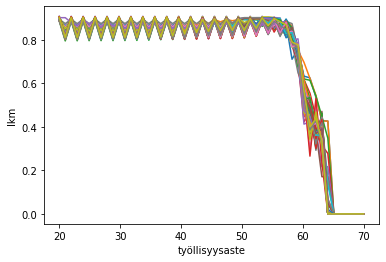

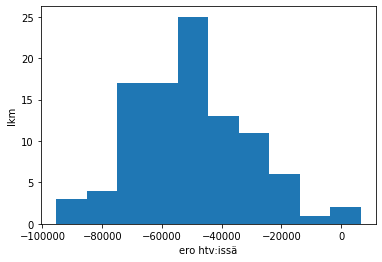

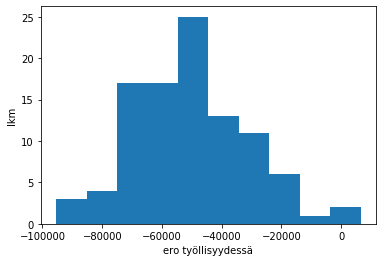

In [8]:
cc=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
cc.run_results(debug=False,steps1=500_000,steps2=100_000,n=100,pop=5_000,deterministic=True)
#cc.run_results(debug=False,steps1=10_000,steps2=10_000,n=10,train=False,predict=False)

In [ ]:
cc=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
cc.run_results(debug=False,steps1=10_000_000,steps2=100_000,n=100,pop=5_000,deterministic=False)

In [3]:
cc=Lifecycle(env='unemployment-v0',minimal=True,timestep=1.0)
cc.plot_simstats('results/simut_res_stats')

minimal model


AttributeError: 'NoneType' object has no attribute 'value'